In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import networkx as nx
from sklearn import cluster
from collections import Counter
from sklearn.metrics import silhouette_score,davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'elliptic_txs_edgelist.csv', 'Untitled.ipynb']


In [3]:
# importing data
df = pd.read_csv('elliptic_txs_edgelist.csv').iloc[:,0:2]

In [4]:
# checking for null values if any
df.isnull().values.any()


False

In [5]:
# basic stats about columns
df.describe(include ='all')

,txId1,txId2
count,2.343550e+05,2.343550e+05
mean,1.612218e+08,1.686881e+08
std,1.134457e+08,1.110120e+08
min,1.076000e+03,1.076000e+03
25%,6.933967e+07,7.342958e+07
50%,1.555782e+08,1.575814e+08
75%,2.433861e+08,2.454072e+08
max,4.032446e+08,4.032446e+08


In [6]:
# plotting digraph (sociogram)
short_edges = df.iloc[0:20,0:2]


In [7]:
graph = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2',
create_using = nx.DiGraph())

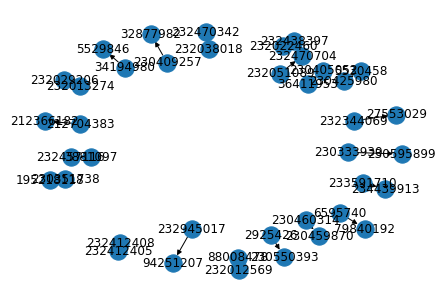

In [8]:
nx.draw(graph, with_labels=True)

In [9]:
# generating adjacency matrix
Adj_mat = nx.to_numpy_matrix(graph)

In [10]:
# clustering using k means
segment = df.iloc[0:234,0:2]

In [11]:
graph = nx.from_pandas_edgelist(segment, source = 'txId1', target = 'txId2', create_using
= nx.DiGraph())


(array([409.,  14.,   1.,   0.,   1.,   2.,   0.,   1.,   0.,   1.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

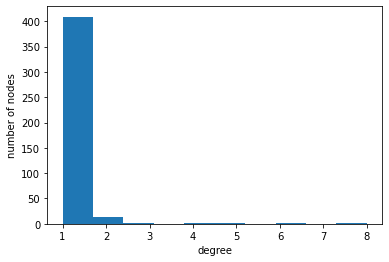

In [12]:
# degree distribution plot
degrees = [graph.degree(n) for n in graph.nodes()]
plt.xlabel("degree")
plt.ylabel("number of nodes")
plt.hist(degrees)

In [13]:
plt.show()

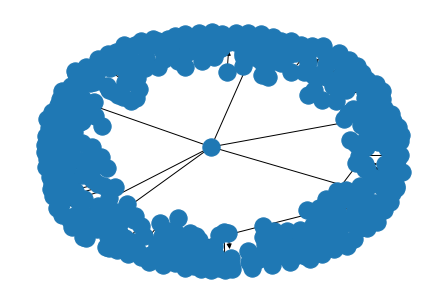

In [15]:
nx.draw(graph, with_labels=False)
Adj_mat = nx.to_numpy_matrix(graph)

In [17]:
# elbow method
cost =[]
for i in range(1, 11):
    # calculates squared error
    # for the clustered points
    cost.append(cluster.KMeans(n_clusters=i, n_init=20).fit(Adj_mat).inertia_)

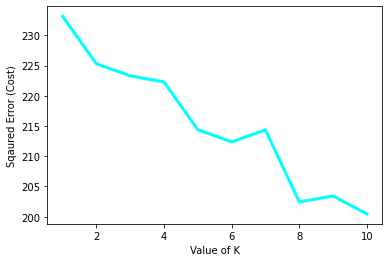

In [18]:
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='cyan', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show()


In [19]:
klabels = cluster.KMeans(n_clusters=3, n_init=20).fit(Adj_mat).labels_


In [20]:
color_map = []
for i in range(len(klabels)):
    if klabels[i] == 0:
        color_map.append('blue')
    elif klabels[i] == 1:
        color_map.append('red')
    elif klabels[i] == 2:
        color_map.append('yellow')

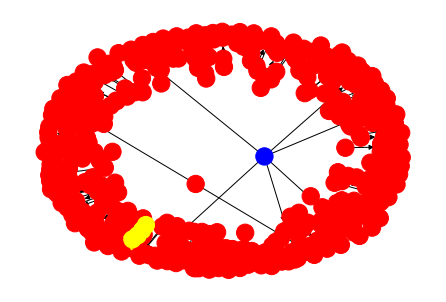

In [21]:
nx.draw(graph, node_color = color_map , with_labels=False)

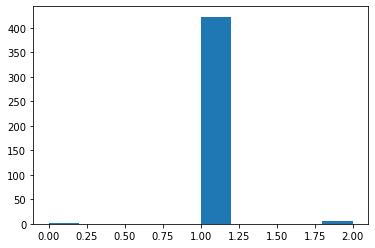

Counter({1: 423, 2: 5, 0: 1})
silhouette score:  0.307013199777005

davies_bouldin score:  0.43593800755517326


In [22]:
# plotting membership of each cluster
plt.hist(klabels)
plt.show()
print(Counter(klabels))
# analysis (The silhouette value is a measure of how similar an object is to its own cluster
#(cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1,
#where a high value indicates that the object is well matched to its own cluster and poorly
#matched to neighboring clusters. If most objects have a high value, then the clustering
#configuration is appropriate.)
print("silhouette score: ", silhouette_score(Adj_mat, klabels))
# clusters which are farther apart and less dispersed will result in a better score.
#The minimum score is zero, with lower values indicating better clustering.
print("\ndavies_bouldin score: ", davies_bouldin_score(Adj_mat, klabels))

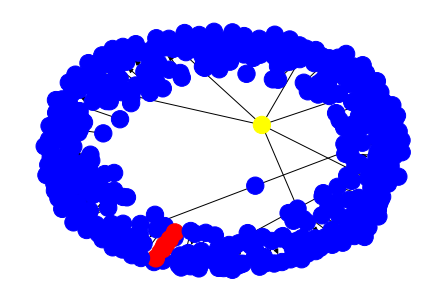

In [23]:
# hierarchical clustering

hlabels = cluster.AgglomerativeClustering(
n_clusters=3,linkage="ward").fit(Adj_mat).labels_
color_map = []

for i in range(len(hlabels)):
    if hlabels[i] == 0:
        color_map.append('blue')
    elif hlabels[i] == 1:
        color_map.append('red')
    elif hlabels[i] == 2:
        color_map.append('yellow')
        
nx.draw(graph, node_color = color_map , with_labels=False)

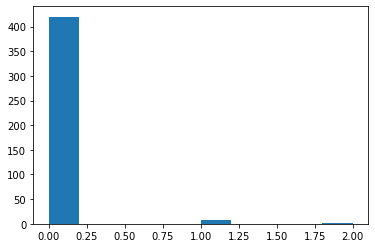

Counter({0: 420, 1: 8, 2: 1})
silhouette score:  0.3149407282288103

davies_bouldin score:  0.43593800755517326


In [25]:
# plotting membership of each cluster

plt.hist(hlabels)
plt.show()
print(Counter(hlabels))
# analysis (Internal indices are used to measure the goodness of a clustering structure without external information)
print("silhouette score: ", silhouette_score(Adj_mat, hlabels))
print("\ndavies_bouldin score: ", davies_bouldin_score(Adj_mat, klabels))

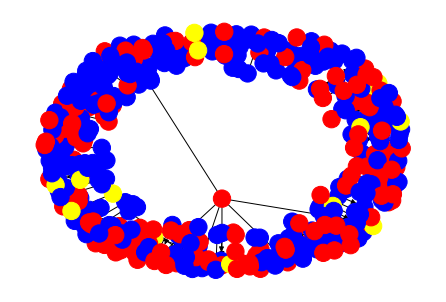

In [27]:
# spectral clustering

slabels = cluster.SpectralClustering(n_clusters=3, affinity="precomputed",
n_init=200).fit(Adj_mat).labels_
color_map = []
for i in range(len(slabels)):
    if slabels[i] == 0:
        color_map.append('blue')
    elif slabels[i] == 1:
        color_map.append('red')
    elif slabels[i] == 2:
            color_map.append('yellow')
            
nx.draw(graph, node_color = color_map , with_labels=False)

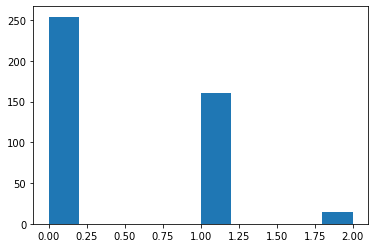

Counter({0: 254, 1: 160, 2: 15})
silhouette score:  -0.038805060894549985

davies_bouldin score:  0.43593800755517326


In [28]:
# plotting membership of each cluster

plt.hist(slabels)
plt.show()
print(Counter(slabels))
# analysis
print("silhouette score: ", silhouette_score(Adj_mat, slabels))
31
print("\ndavies_bouldin score: ", davies_bouldin_score(Adj_mat, klabels))